In [164]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [165]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [166]:
NUM_CLASSES = 7

# Dataset reading

In [167]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [168]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [170]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [171]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_18 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# Update the model_save_path to use .keras extension
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [173]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [174]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.3438 - loss: 1.8578
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4222 - loss: 1.7519 - val_accuracy: 0.5128 - val_loss: 1.5302
Epoch 2/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 1.5855
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4747 - loss: 1.5778 - val_accuracy: 0.5230 - val_loss: 1.3966
Epoch 3/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 1.5243
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 1.4681 - val_accuracy: 0.5485 - val_loss: 1.3066
Epoch 4/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4844 - loss: 1.4708
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
1

Epoch 25/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7109 - loss: 0.7466
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7212 - loss: 0.7202 - val_accuracy: 0.8610 - val_loss: 0.4693
Epoch 26/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7422 - loss: 0.6800
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7234 - loss: 0.6899 - val_accuracy: 0.8597 - val_loss: 0.4567
Epoch 27/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.6126
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7503 - loss: 0.6514 - val_accuracy: 0.8673 - val_loss: 0.4401
Epoch 28/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7969 - loss: 0.5829
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.k

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.5487 - val_accuracy: 0.8686 - val_loss: 0.3277
Epoch 49/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.5485
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.5225 - val_accuracy: 0.8673 - val_loss: 0.3222
Epoch 50/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5666
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.5531 - val_accuracy: 0.8686 - val_loss: 0.3184
Epoch 51/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.5226
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 0.5446 - val_accuracy: 0.8699 - val_loss: 0.3154
Epoch 52/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8

 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5273
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.4652 - val_accuracy: 0.8839 - val_loss: 0.2746
Epoch 73/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.5552
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.4904 - val_accuracy: 0.8852 - val_loss: 0.2727
Epoch 74/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.4667
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8106 - loss: 0.4842 - val_accuracy: 0.8827 - val_loss: 0.2714
Epoch 75/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8984 - loss: 0.3139
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━

Epoch 96/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.4810
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.4619 - val_accuracy: 0.8929 - val_loss: 0.2528
Epoch 97/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8359 - loss: 0.4494
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8377 - loss: 0.4510 - val_accuracy: 0.8941 - val_loss: 0.2512
Epoch 98/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.5204
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.4340 - val_accuracy: 0.8916 - val_loss: 0.2521
Epoch 99/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.4053
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.k

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.4549 - val_accuracy: 0.9005 - val_loss: 0.2374
Epoch 120/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8359 - loss: 0.4451
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.4440 - val_accuracy: 0.9018 - val_loss: 0.2324
Epoch 121/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.5742
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8124 - loss: 0.4796 - val_accuracy: 0.9247 - val_loss: 0.2351
Epoch 122/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.4133
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8374 - loss: 0.4356 - val_accuracy: 0.9018 - val_loss: 0.2319
Epoch 123/1000
 1/19 ━━━━━━━━━━━━━━━━━━

Epoch 143/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.3741
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.4218 - val_accuracy: 0.9171 - val_loss: 0.2258
Epoch 144/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8672 - loss: 0.3990
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8413 - loss: 0.4159 - val_accuracy: 0.9133 - val_loss: 0.2262
Epoch 145/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8281 - loss: 0.4332
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8317 - loss: 0.4262 - val_accuracy: 0.9005 - val_loss: 0.2248
Epoch 146/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7969 - loss: 0.5535
Epoch 146: saving model to model/keypoint_classifier/keypoint_clas

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.4191 - val_accuracy: 0.9069 - val_loss: 0.2142
Epoch 167/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.3941
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8543 - loss: 0.3860 - val_accuracy: 0.9311 - val_loss: 0.2141
Epoch 168/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3699
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.4028 - val_accuracy: 0.9069 - val_loss: 0.2149
Epoch 169/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.3304
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.4155 - val_accuracy: 0.9158 - val_loss: 0.2171
Epoch 170/1000
 1/19 ━━━━━━━━━━━━━━━━━━

In [175]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9154 - loss: 0.2089


In [176]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [177]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[2.4068324e-08 9.8683202e-01 2.7188804e-07 2.4331390e-05 3.9588258e-06
 1.3138011e-02 1.4359427e-06]
1


# Confusion matrix

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


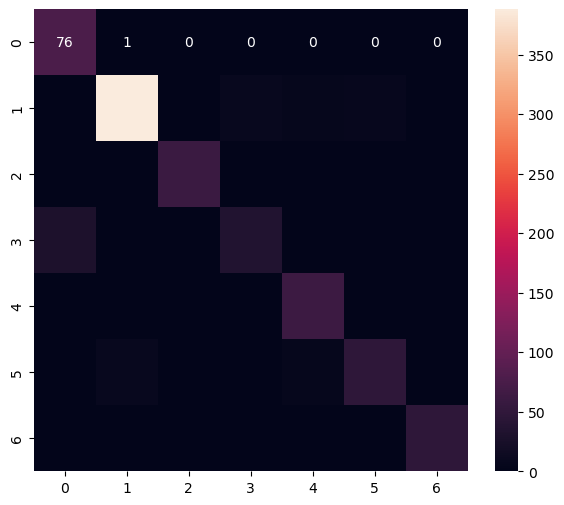

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.99      0.84        77
           1       0.97      0.95      0.96       410
           2       0.98      0.98      0.98        61
           3       0.79      0.54      0.64        63
           4       0.85      1.00      0.92        62
           5       0.85      0.75      0.80        63
           6       0.98      1.00      0.99        48

    accuracy                           0.91       784
   macro avg       0.88      0.89      0.88       784
weighted avg       0.92      0.91      0.91       784



In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [179]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [180]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/hh/xl98xr0533n4kzfq8ws3ttnh0000gn/T/tmplkqnnsod/assets


INFO:tensorflow:Assets written to: /var/folders/hh/xl98xr0533n4kzfq8ws3ttnh0000gn/T/tmplkqnnsod/assets


Saved artifact at '/var/folders/hh/xl98xr0533n4kzfq8ws3ttnh0000gn/T/tmplkqnnsod'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  13347834384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13347833808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13329179728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13329181648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13329180112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13329184912: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1729832919.824457  296568 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1729832919.824470  296568 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


6688

# Inference test

In [181]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [182]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [183]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [184]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 660 µs, sys: 26 µs, total: 686 µs
Wall time: 104 µs


In [185]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.40683242e-08 9.86832023e-01 2.71888041e-07 2.43313643e-05
 3.95881852e-06 1.31379925e-02 1.43594002e-06]
1
